# MNIST - Categorical Classfication

  Overfitting Issue

## Import Tensorflow

In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.__version__

'2.5.0'

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

## 1. MNIST Data_Set Load & Review

### 1) Load MNIST Data_Set

In [3]:
from tensorflow.keras.datasets import mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
print(len(X_train),X_train.shape)
print(len(y_train),y_train[:5])
print(len(X_test),X_test.shape)
print(len(y_test),y_test[:5])

60000 (60000, 28, 28)
60000 [5 0 4 1 9]
10000 (10000, 28, 28)
10000 [7 2 1 0 4]


### 2) Visualization

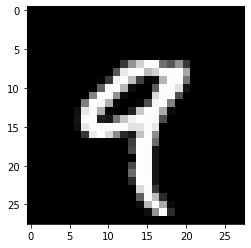

In [5]:
import matplotlib.pyplot as plt

digit = X_train[4]
plt.imshow(digit,cmap='gray')
plt.show()

In [6]:
import numpy as np

np.set_printoptions(linewidth=150)
print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

## Data Preprocessing

### 1) Reshape and Encoding

- reshape X_train(60000, 28, 28) -> (60000,784), X_test(10000, 28, 28) -> (10000,784)
          

In [7]:
X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))


- Nomalization 0~1사이 값으로 변환

In [8]:
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255
print(X_train[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

- One-Hot Encoding

In [9]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## 3.MNIST Keras Modeling

### 1) Model Define

    - 모델 신경망 구조 정의
      - 2개의 Hidden Layers & 768개의 Nodes
      - 복잡한 Model Capacity로 인한 Overfitting

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512,input_shape=(28 * 28,)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(256))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(10, activation='softmax'))

In [12]:
mnist.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

### 2) Model Compile

- 학습방법 설정

In [13]:
mnist.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### 3)Model Fit

In [14]:
%time

Hist_mnist = mnist.fit(X_train,y_train,
                       epochs=100,
                       batch_size = 128,
                       validation_split = 0.2)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 0.1836 - accuracy: 0.9454 - val_loss: 0.1029 - val_accuracy: 0.9684
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0732 - accuracy: 0.9776 - val_loss: 0.1002 - val_accuracy: 0.9708
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0467 - accuracy: 0.9850 - val_loss: 0.0825 - val_accuracy: 0.9747
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.0831 - val_accuracy: 0.9775
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0234 - accuracy: 0.9925 - val_loss: 0.0938 - val_accuracy: 0.9763
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0166 - accuracy: 0.9945 - val_loss: 0.0818 - val_accuracy: 0.9793
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0

### 4) 학습결과 시각화 - Overfitting


1. Loss

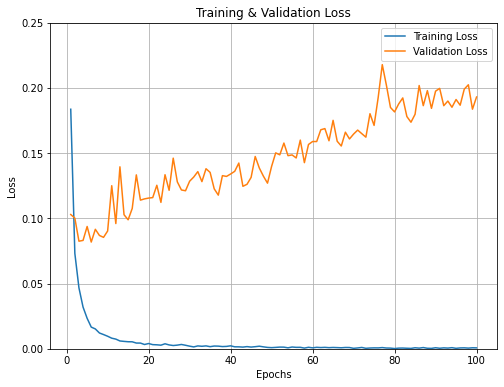

In [20]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (8,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.ylim(0,0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

## 5) Model Evaluate

In [17]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss : ', loss)
print('accuracy : ', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1669 - accuracy: 0.9834
Loss :  0.1669163852930069
accuracy :  0.9833999872207642


In [21]:
np.set_printoptions(suppress = True, precision = 9)
print(mnist.predict(X_test[:1,:]))


[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
